In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



### 1. Load the data

In [4]:
data = np.load('data.npy')
targets = np.load('targets.npy')
feature_names = np.load('feature_names.npy')
class_names = np.load('class_names.npy')

### 2. Scatter plot

In [11]:
x_data = data[np.where(feature_names == 'mean texture')][0]
y_data = data[np.where(feature_names == 'worst perimeter')][0]

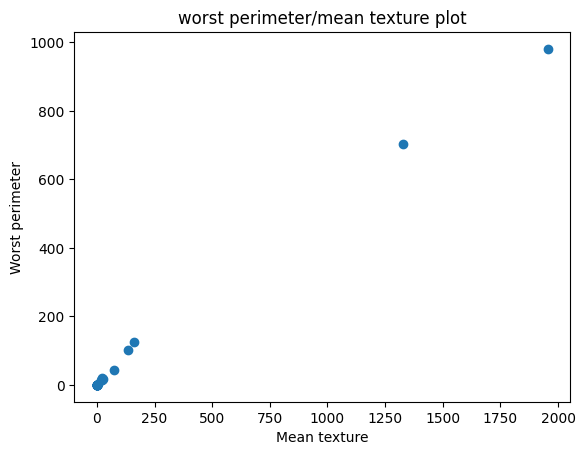

In [15]:
plt.scatter(x_data, y_data)
plt.xlabel("Mean texture")
plt.ylabel("Worst perimeter")
plt.title("worst perimeter/mean texture plot")
plt.show()

### 3. PCA

In [19]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

In [20]:
data_pca

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

### 4. Train-test split

In [23]:
train_data, test_data, train_targets, test_targets = train_test_split(data_pca, targets, train_size=0.7, random_state=101)

In [24]:
print(train_data, test_data, train_targets, test_targets)

[[-3.00734139e+02  3.09274552e+01]
 [-5.91573734e+01  3.87107443e+01]
 [ 9.09989494e+01 -5.26642487e+01]
 [ 9.83555360e+01 -4.57581581e+00]
 [-6.35064042e+02 -4.82346030e+01]
 [-4.27105870e+02 -2.23238645e+01]
 [-9.05470582e+01  8.47029371e+01]
 [-3.58981873e+02  3.87104912e+01]
 [-4.41247952e+02 -3.21354434e+01]
 [-4.44380417e+02  2.63057937e+01]
 [-4.62028008e+02 -5.28025874e+01]
 [ 1.09240105e+03 -1.05035759e+02]
 [-4.86023943e+02 -1.75371131e+00]
 [-4.70842227e+02 -2.54815613e+01]
 [-3.57812660e+02 -1.41672551e+01]
 [ 4.57687259e+02 -1.71342840e+02]
 [-4.88804882e+02 -4.97386372e+01]
 [-3.43752015e+01 -1.07672761e+02]
 [-8.06577946e+01  2.33635273e+01]
 [ 8.02698919e+01  3.34517733e+01]
 [ 2.33819327e+02  2.02557075e+01]
 [-4.34234474e+02 -1.16352281e+01]
 [-6.22214536e+02 -1.42743169e+01]
 [-3.83867453e+02  8.91186935e+00]
 [ 5.21529369e+01  1.24551170e+02]
 [-2.77648999e+02  8.76978343e-01]
 [-3.37662831e+02  1.36031088e+01]
 [ 1.35645994e+03  3.09994245e+01]
 [-3.68577841e+02  4

### 5. Logistic regression
Train a logistic regression classifier. Set the regularization constant to C=0.5. Then classify the test examples using the trained classifier.

In [26]:
clf = LogisticRegression(C=0.5).fit(train_data, train_targets)

In [27]:
predictions = clf.predict(test_data)

In [28]:
predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

### 6. Confusion matrix

In [30]:
cnfmtrx = confusion_matrix(test_targets, predictions)

In [31]:
cnfmtrx

array([[ 57,   9],
       [  5, 100]])

In [32]:
print(f'There were {cnfmtrx[0][0]} true negatives, {cnfmtrx[1][1]} true positives, {cnfmtrx[1][0]} false negatives, and {cnfmtrx[0][1]} false positives')

There were 57 true negatives, 100 true positives, 5 false negatives, and 9 false positives


### 7. Plot

In [34]:
train_data

array([[-3.00734139e+02,  3.09274552e+01],
       [-5.91573734e+01,  3.87107443e+01],
       [ 9.09989494e+01, -5.26642487e+01],
       [ 9.83555360e+01, -4.57581581e+00],
       [-6.35064042e+02, -4.82346030e+01],
       [-4.27105870e+02, -2.23238645e+01],
       [-9.05470582e+01,  8.47029371e+01],
       [-3.58981873e+02,  3.87104912e+01],
       [-4.41247952e+02, -3.21354434e+01],
       [-4.44380417e+02,  2.63057937e+01],
       [-4.62028008e+02, -5.28025874e+01],
       [ 1.09240105e+03, -1.05035759e+02],
       [-4.86023943e+02, -1.75371131e+00],
       [-4.70842227e+02, -2.54815613e+01],
       [-3.57812660e+02, -1.41672551e+01],
       [ 4.57687259e+02, -1.71342840e+02],
       [-4.88804882e+02, -4.97386372e+01],
       [-3.43752015e+01, -1.07672761e+02],
       [-8.06577946e+01,  2.33635273e+01],
       [ 8.02698919e+01,  3.34517733e+01],
       [ 2.33819327e+02,  2.02557075e+01],
       [-4.34234474e+02, -1.16352281e+01],
       [-6.22214536e+02, -1.42743169e+01],
       [-3.

In [41]:
# read the logistic regression model parameters
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

# calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# plot the data and the classification with the decision boundary.
xmin, xmax = np.min([np.min(train_data,0)[0]-1, np.min(test_data,0)[0]-1]), np.max([np.max(train_data,0)[0]+1, np.max(test_data,0)[0]+1])
ymin, ymax = np.min([np.min(train_data,0)[1]-1, np.min(test_data,0)[1]-1]), np.max([np.max(train_data,0)[1]+1, np.max(test_data,0)[1]+1])

xd = np.array([xmin, xmax])
yd = m*xd + c


Text(0.5, 1.0, 'Breast cancer classification')

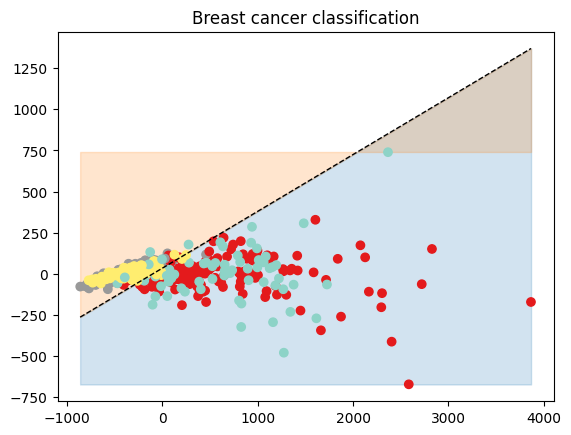

In [42]:
plt.figure()
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

y = np.choose(train_targets, [0, 1]).astype(float)
y2 = np.choose(test_targets, [0, 1]).astype(float)
plt.scatter(train_data[:,0], train_data[:,1], c=y, cmap=plt.cm.Set1)
plt.scatter(test_data[:,0], test_data[:,1], c=y2, cmap=plt.cm.Set3)
plt.title("Breast cancer classification")
